In [327]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split


import xgboost as xgb

In [328]:
conn = sqlite3.connect('RDS-2013-0009.4_SQLITE/Data/FPA_FOD_20170508.sqlite')

In [329]:
# full_df = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
# print(full_df.head()) 

In [330]:
# print(full_df.columns)
# full_df['DATE'] = pd.to_datetime(full_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [331]:
# full_df.describe()

In [332]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE FROM 'Fires'", conn)
print(df.head()) 

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE  
0             33       0.10  
1            133       0.25  
2            152       0.10  
3            180       0.10  
4            180       0.10  


In [333]:
#Julian date format to Gregorian date format
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


In [334]:
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE       DATE  
0             33       0.10 2005-02-02  
1            133       0.25 2004-05-12  
2            152       0.10 2004-05-31  
3            180       0.10 2004-06-28  
4            180       0.10 2004-06-28  


In [335]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

In [336]:
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  
0             33       0.10 2005-02-02      2   Wednesday  
1            133       0.25 2004-05-12      5   Wednesday  
2            152       0.10 2004-05-31      5      Monday  
3            180       0.10 2004-06-28      6      Monday  
4            180       0.10 2004-06-28      6      Monday  


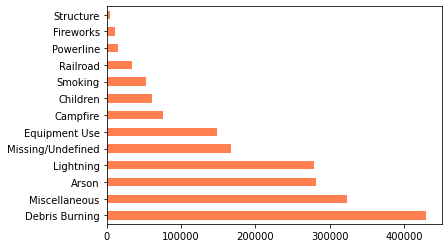

In [337]:
#causes of fire
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

In [338]:
le = preprocessing.LabelEncoder()
df['STATE'] = le.fit_transform(df['STATE'])
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
df = df.dropna()
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833      4       2453403.5   
1       2004        Lightning  38.933056 -120.404444      4       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556      4       2453156.5   
3       2004        Lightning  38.559167 -119.913333      4       2453184.5   
4       2004        Lightning  38.559167 -119.933056      4       2453184.5   

   DISCOVERY_DOY  FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  
0             33       0.10 2005-02-02      2            6  
1            133       0.25 2004-05-12      5            6  
2            152       0.10 2004-05-31      5            1  
3            180       0.10 2004-06-28      6            1  
4            180       0.10 2004-06-28      6            1  


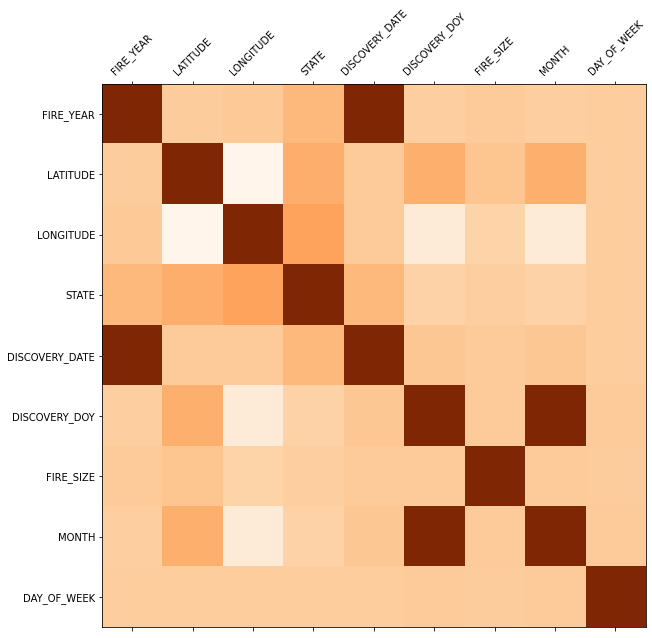

In [339]:
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df)

In [340]:
df_drop_date = df.drop('DATE',axis=1)

In [341]:
df_og = df_drop_date.copy()

In [342]:
df_drop_date.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,4,2453403.5,33,0.10,2,6
1,2004,Lightning,38.933056,-120.404444,4,2453137.5,133,0.25,5,6
2,2004,Debris Burning,38.984167,-120.735556,4,2453156.5,152,0.10,5,1
3,2004,Lightning,38.559167,-119.913333,4,2453184.5,180,0.10,6,1
4,2004,Lightning,38.559167,-119.933056,4,2453184.5,180,0.10,6,1


In [343]:
df_og.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,4,2453403.5,33,0.10,2,6
1,2004,Lightning,38.933056,-120.404444,4,2453137.5,133,0.25,5,6
2,2004,Debris Burning,38.984167,-120.735556,4,2453156.5,152,0.10,5,1
3,2004,Lightning,38.559167,-119.913333,4,2453184.5,180,0.10,6,1
4,2004,Lightning,38.559167,-119.933056,4,2453184.5,180,0.10,6,1


In [344]:
df_drop_month_fy = df_drop_date.drop('MONTH',axis=1)
df_drop_month_fy = df_drop_month_fy.drop('FIRE_YEAR',axis=1)

In [345]:
df_drop_month_fy['STAT_CAUSE_DESCR'] = le.fit_transform(df_drop_month_fy['STAT_CAUSE_DESCR'])

In [346]:
df_drop_month_fy.head()

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,DAY_OF_WEEK
0,7,40.036944,-121.005833,4,2453403.5,33,0.10,6
1,6,38.933056,-120.404444,4,2453137.5,133,0.25,6
2,3,38.984167,-120.735556,4,2453156.5,152,0.10,1
3,6,38.559167,-119.913333,4,2453184.5,180,0.10,1
4,6,38.559167,-119.933056,4,2453184.5,180,0.10,1


In [347]:
X_month_fy = df_drop_month.drop(['STAT_CAUSE_DESCR'], axis=1).values
y_moth_fy = df['STAT_CAUSE_DESCR'].values

print(X_month_fy.shape)
print(y_moth_fy.shape)

(1880465, 7)
(1880465,)


In [348]:
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X_month_fy,y_moth_fy,test_size=0.25, random_state=0)
#The Decision tree model
clf_dt = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
clf_dt = clf_dt.fit(X_train_75, y_train_75)
print(clf_dt.score(X_test_25,y_test_25))

0.5494419474301078


In [ ]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train_75, y_train_75)
print(clf_rf.score(X_test_25,y_test_25))

In [ ]:
# df_drop_doy_fy = df.drop('DISCOVERY_DOY',axis=1)
# df_drop_doy_fy = df_drop_doy_fy.drop('FIRE_YEAR',axis=1)

In [ ]:
# df_drop_doy_fy.head()

In [ ]:
# X_doy_fy = df_drop_doy_fy.drop(['STAT_CAUSE_DESCR'], axis=1).values
# y_doy_fy = df['STAT_CAUSE_DESCR'].values

In [ ]:
# X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X_doy_fy,y_doy_fy,test_size=0.25, random_state=0)
# #The Decision tree model
# clf_dt = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
# clf_dt = clf_dt.fit(X_train_75, y_train_75)
# print(clf_dt.score(X_test_25,y_test_25))

In [ ]:
df_drop_month_fy_4 = df_og.copy()
df_drop_month_fy_4 = df_drop_month_fy_4.drop('MONTH',axis=1)
df_drop_month_fy_4 = df_drop_month_fy_4.drop('FIRE_YEAR',axis=1)
df_drop_month_fy_4.head()

In [ ]:
#Putting all the causes into 4 different categories, since there are so many of them. 
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause

df_drop_month_fy_4['LABEL'] = df_drop_month_fy_4['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
df_drop_month_fy_4 = df_drop_month_fy_4.drop('STAT_CAUSE_DESCR',axis=1)
print(df_drop_month_fy_4.head())
#The new categories are: "natural, accidental, malicious and other"

In [ ]:
#This time we want to predict 'Label'. Splitting the dataset into train and test sets once again.
X_label = df_drop_month_fy_4.drop(['LABEL'], axis=1).values
y_label = df_drop_month_fy_4['LABEL'].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_label,y_label,test_size=0.25, random_state=0)

In [ ]:
#The Decision tree model
clf_dt_label = tree.DecisionTreeClassifier(random_state=0, max_depth=30)
clf_dt_label = clf_dt_label.fit(X_train_4, y_train_4)
print(clf_dt_label.score(X_test_4,y_test_4))

In [ ]:
#The Gradient boost model
xg_clf = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.2, max_depth = 15, alpha = 20, n_estimators = 500, subsample=0.8)
xg_clf = xg_clf.fit(X_train_4, y_train_4)
print(xg_clf.score(X_test_4,y_test_4))